# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [2]:
# Your code here. 

import pandas as pd
import numpy as np


In [4]:
student_data = pd.DataFrame({'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [5]:
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [6]:
# Your code here

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

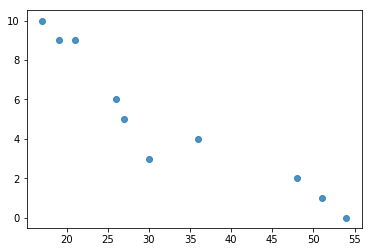

In [7]:
plt.scatter(student_data['Age'], student_data['Tardies'], alpha = 0.8)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [8]:
# Your response here. 

# Yes, it really looks like the younger the students are, the later they are too.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [10]:
# Your response here.

# Covariance is a measure of relationship between 2 variables. It measures the degree of change in the variables, 
# i.e. when one variable changes, will there be the same/a similar change in the other variable.

student_data[['Age', 'Tardies']].cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [11]:
# A correlation coefficient will always be between -1 and 1. 
# The closer the value is to -1 or 1, the strong the relationship, the closer to 0 then the weaker it is. 
# If the correlation coefficient value is positive, it means as one variable increase so does the other, 
# and if the correlation coefficient value is negative, 
# it means as one variable increases the other decreases. 

student_data[['Age', 'Tardies']].corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [12]:
# Here we can see that the correlation coefficent is very close to -1 : as one variable increases, the other decreases.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here.

from scipy import stats
from scipy.stats import linregress
import statsmodels.api as sm

In [45]:
X = sm.add_constant(student_data.Age) # We must add the intercept using the add_constant function
Y = student_data.Tardies

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Mon, 16 Sep 2019   Prob (F-statistic):           5.57e-05
Time:                        20:44:59   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [57]:
# From statsmodels
intercept = model.params['const']
slope = model.params['Age']

In [58]:
slope_scipy, intercept_scipy, r_value_scipy, p_value_scipy, std_err_scipy = linregress(student_data.Age, student_data.Tardies)
print(slope_scipy, intercept_scipy, r_value_scipy, p_value_scipy, std_err_scipy)

-0.2428207709159808 12.888803363135768 -0.9391626886887121 5.56665383455343e-05 0.03139728816158607


Plot your regression model on your scatter plot.

In [59]:
# Your code here.

In [61]:
print(slope)
print(intercept)

-0.2428207709159807
12.888803363135764


In [62]:
line = slope*student_data['Age']+intercept
print(line)

0    8.760850
1    0.504944
2    6.332643
3    7.789567
4    4.147256
5    1.233406
6    8.275209
7    6.575463
8   -0.223518
9    5.604180
Name: Age, dtype: float64


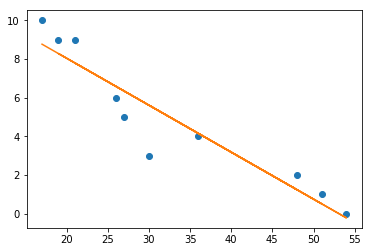

In [63]:
line = slope*student_data['Age']+intercept
plt.plot(student_data.Age, student_data.Tardies, "o", student_data.Age, line, '-')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

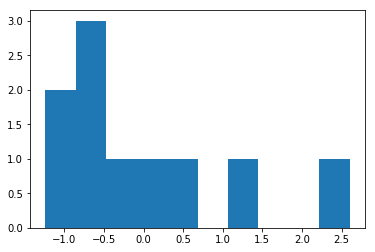

In [67]:
# Your response here. 

errors = predictions - Y

plt.hist(errors)
plt.show()

# Pas possible d'utiliser ce modèle car trop peu de points.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [29]:
# Import any libraries you may need & the data

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [30]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [35]:
# Your response here.

# A correlation coefficient will always be between -1 and 1. 
# The closer the value is to -1 or 1, the stronger the relationship, the closer to 0 then the weaker it is. 
# If the correlation coefficient value is positive, it means as one variable increase so does the other, 
# and if the correlation coefficient value is negative, 
# it means as one variable increases the other decreases. 

correlations = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']].corr()
correlations

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [33]:
# Comments

# The most important variable in determining CO2 emissions is the Fuel Barrels / Year 
# because the correlation coef. is very close to 1.

# The least important variable would be the Year as the corr coef is the closest to 0.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [68]:
# Your response here. 

slope, intercept, r_value, p_value, std_err = linregress(vehicles['Fuel Cost/Year'], vehicles['CO2 Emission Grams/Mile'])
slope, intercept, r_value, p_value, std_err

(0.2186165077161391,
 61.56307241317205,
 0.9308651512201843,
 0.0,
 0.0004525548399302676)

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [69]:
# Your response here.

# add.constant permet d'ajouter une constante avec uniquement des valeurs égales à 1. 
# La librairie Statsmodel ne peut pas lire la fonction sans valeur constante, donc elle est ajoutée artificiellement avec add_constant.

X = sm.add_constant(vehicles['CO2 Emission Grams/Mile']) # We must add the intercept using the add_constant function
Y = vehicles['Fuel Cost/Year']


model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:         Fuel Cost/Year   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 2.334e+05
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        21:03:22   Log-Likelihood:            -2.3874e+05
No. Observations:               35952   AIC:                         4.775e+05
Df Residuals:                   35950   BIC:                         4.775e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


In [73]:
# From statsmodels
intercept = model.params['const']
slope = model.params['CO2 Emission Grams/Mile']

In [75]:
print(slope)
print(intercept)

3.9636070432580968
8.631274563951706


In [77]:
line = slope*vehicles['CO2 Emission Grams/Mile']+intercept

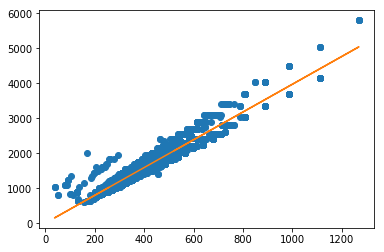

In [80]:
plt.plot(vehicles['CO2 Emission Grams/Mile'], vehicles['Fuel Cost/Year'], "o", vehicles['CO2 Emission Grams/Mile'], line, '-')

In [ ]:
# Le Plot nous permet de bien visualiser la corrélation entre les émissions de CO2 et le coût du carburant par an.
# La droite de régression linéaire met en évidence cette corrélation.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 